# Lab 9

# Introducing Scikit-Learn

In this lab, you'll be working a few exercises on the material in Chapter 5 to get an introduction to the machine learning library for Python, `scikit_learn`.


---

# Exercises

In this section, you will be provided a few exercises to demonstrate your understanding of the chapter contents. Each exercise will have a Markdown section describing the problem, and you will provide cells below the description with code, comments and visual demonstrations of your solution.

### Problem 1

- Load the `'titanic'` dataset from `seaborn`
- Add a `'quantile'` column to the DataFrame that calculates which bin (of 20) that each passenger's fare amount belongs to among the fares for all passengers. Each bin has roughly the same number of passengers in it.

```python
titanic['quantile'] = list(pd.qcut(titanic.fare, 20).apply(lambda v:v.mid))
```

- Create a variable, `survival_by_quantile` equal to the mean survival rate of passengers in each quantile (hint: groupby)
- Create two variables, `x` and `y`, equal to the values of the index and series values of `survival_by_quantile`, respectively
- Transform `x` and `y` into the forms expected by Scikit-learn's Estimator API
- Use the linear regression model from [Section 5.02](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb#Supervised-learning-example:-Simple-linear-regression) to find a linear model for `x` and `y`
- Using the original `x` values, calculate the y values predicted by your linear model (save as `y_predicted`)
- Plot the following
    - Original `x` and `y` as a point plot in blue
    - `x` and `y_predicted` as a point plot in red
    - `x` and `y_predicted` as a line plot in blue

Based on your plot, would you say that a linear model is satisfactory for predicting the relationship between fare and survival rates?

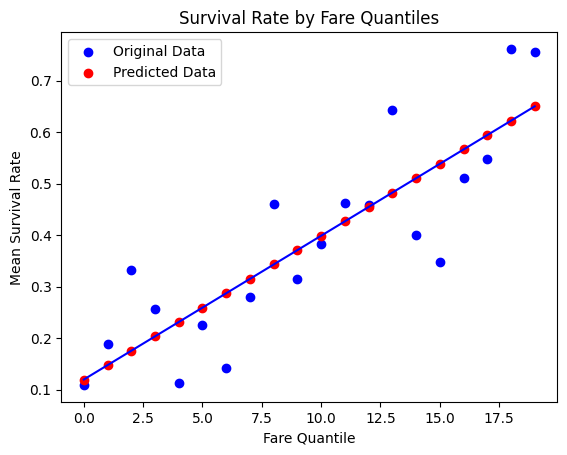

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Load dataset
titanic = sns.load_dataset('titanic')

# Create quantile column with numeric labels
titanic['quantile'] = pd.qcut(titanic['fare'], 20, labels=False)

# Calculate mean survival by quantile
survival_by_quantile = titanic.groupby('quantile')['survived'].mean()

# Prepare x and y
x = survival_by_quantile.index.values.reshape(-1, 1).astype(float)
y = survival_by_quantile.values

# Fit linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict y values
y_predicted = model.predict(x)

# Plot
plt.scatter(x, y, color='blue', label='Original Data')
plt.scatter(x, y_predicted, color='red', label='Predicted Data')
plt.plot(x, y_predicted, color='blue')
plt.title('Survival Rate by Fare Quantiles')
plt.xlabel('Fare Quantile')
plt.ylabel('Mean Survival Rate')
plt.legend()
plt.show()




---

### Problem 2



- Use `sklearn.datasets.load_breast_cancer()` function to load that data into a variable `cancer`
- Use the `Isomap` manifold learning dimensionality reduction method (`components=2`) to visualize the data in a 2D scatter plot
- Use the `PCA` dimensionality reduction method (`components=2`) to visualize the data in a 2D scatter plot
- Use Gaussian naive Bayes to model the data (making sure to split the data into training and test data/target sets)
- Perform 5-fold cross validation on your Gaussian naive Bayes model


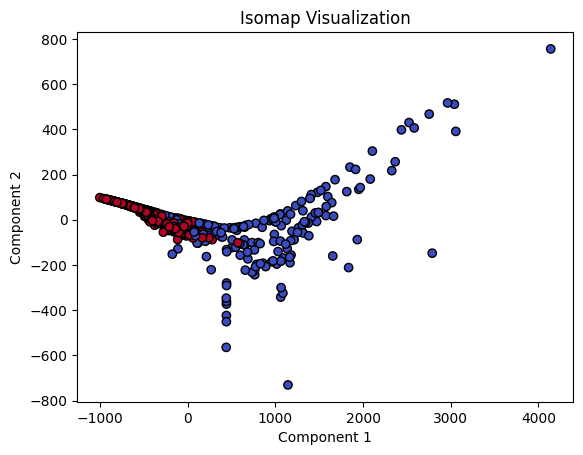

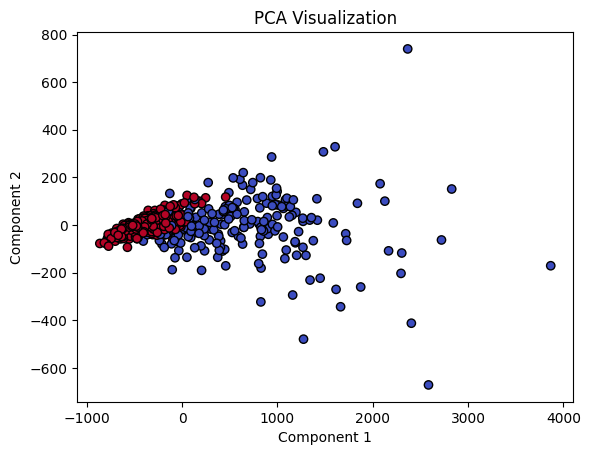

Cross-Validation Scores: [0.91208791 0.94505495 0.94505495 0.94505495 0.92307692]
Mean Score: 0.9340659340659341


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB

# Load dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Isomap visualization
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Isomap Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# PCA visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('PCA Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
model = GaussianNB()
scores = cross_val_score(model, X_train, y_train, cv=5)
print('Cross-Validation Scores:', scores)
print('Mean Score:', scores.mean())



